### Training and evaluating the model

In this notebook, the model is trained using the preprocessed training data and an initial configuration. The model is then evaluated based on the test data and continuously optimized by adjusting the hyperparameters. The goal is to find the best hyperparameters for the model to achieve the best possible performance. 

In [206]:
import os
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras import layers, models, utils
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [207]:
# Setting all random seeds to a fixed value to make the results reproducible
seed_value = 42
tf.random.set_seed(seed_value)
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)

In [208]:
data = pd.read_csv('../data/processed/preprocessed_data.csv')

features = data.drop('Anzahl_der_Fahrzeuge', axis=1)
target = data['Anzahl_der_Fahrzeuge']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=seed_value)

In [209]:
def build_sequential_model(num_layers, neurons_per_layer, activation_function, input_shape, optimizer, loss_function, metrics):
    model = models.Sequential()

    model.shape = (input_shape, )

    for i in range(num_layers):
        model.add(layers.Dense(neurons_per_layer, activation=activation_function, name=f'hidden_layer_{i+1}'))

    model.add(layers.Dense(1, activation='relu', name='output'))

    model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)

    return model

In [210]:
def show_model_structure(input_model, input_shape):
    # Building the model in order to visualize the structure
    input_model.build(input_shape=(None, input_shape))

    # Printing a summary of the model
    input_model.summary()
    
def plot_model(input_model):
    return utils.plot_model(input_model, show_shapes=True, show_layer_names=True, show_trainable=True, show_layer_activations=True, expand_nested=True, dpi=96)

In [211]:
def plot_history(model_history):
    training_loss = model_history.history['loss']
    validation_loss = model_history.history['val_loss']
    epochs = range(1, len(training_loss) + 1)
    
    plt.plot(epochs, training_loss, 'r--', label='Training loss')
    plt.plot(epochs, validation_loss, 'b-', label='Validation loss')
    plt.title('Training & validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
def show_examplary_predictions(model, features_test, target_test):
    predictions = model.predict(features_test)
    predictions = predictions.flatten()
    predictions = np.round(predictions)
    
    results = pd.DataFrame({'Predicted': predictions, 'Actual': target_test})
    results = results.astype({'Actual': 'int32', 'Predicted': 'int32'})

    # The difference between the actual and predicted values in percent    
    results['Difference (%)'] = ((results['Actual'] - results['Predicted']) / results['Actual']) * 100
    results['Difference (%)'] = results['Difference (%)'].round(0).astype('int32')
    results['Difference (%)'] = results['Difference (%)'].abs()
    
    return results

In [212]:
first_model = build_sequential_model(
    num_layers=2,
    neurons_per_layer=64,
    activation_function='relu',
    input_shape=(features_train.shape[1],),
    optimizer='adam',
    loss_function='mean_squared_error',
    metrics=['mse']
)

show_model_structure(first_model, features_train.shape[1])
# plot_model(first_model)

Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 47576.4414 - mse: 47578.2109 - val_loss: 45558.9258 - val_mse: 46493.9375
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 41493.2266 - mse: 41495.6875 - val_loss: 26849.1719 - val_mse: 27489.2734
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 20413.8027 - mse: 20414.9922 - val_loss: 11860.4600 - val_mse: 12208.4453
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 11211.0527 - mse: 11211.6133 - val_loss: 11370.1484 - val_mse: 11701.8691
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 10947.2832 - mse: 10947.8154 - val_loss: 11178.9404 - val_mse: 11509.3408
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 10773.9180 - mse: 10774.4277 - val_loss: 11033.9111 - val_mse: 11363.8574
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - loss: 10636.3193 - mse: 10636.8105 - val_loss: 10912.5439 - val_mse: 11242.2822
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 1051

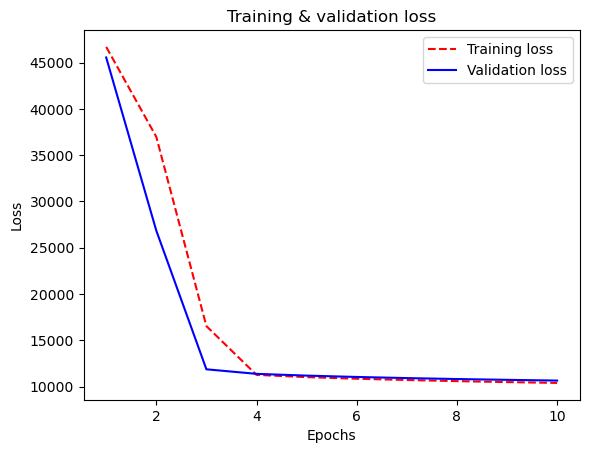

In [213]:
history = first_model.fit(features_train, target_train, epochs=10, batch_size=32, validation_data=(features_test, target_test))
plot_history(history)

In [214]:
example_predictions = show_examplary_predictions(first_model, features_test, target_test)
example_predictions.head(10)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Predicted,Actual,Difference (%)
867,224,130,72
1221,251,564,55
874,232,77,201
354,101,214,53
599,187,175,7
2559,145,282,49
309,158,103,53
2155,263,309,15
2337,318,463,31
479,106,83,28


In [215]:
# Calculating the average difference between the actual and predicted values but use the absolute values
average_difference = example_predictions['Difference (%)'].abs().mean()
print(f'The average difference between the actual and predicted values is {average_difference:.2f}%')

The average difference between the actual and predicted values is 71.62%


#### Second model with more layers and epochs

Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 44870.0195 - mse: 44872.9570 - val_loss: 14730.4688 - val_mse: 14967.3457
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 11950.5088 - mse: 11951.0342 - val_loss: 10848.8066 - val_mse: 11162.0723
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 10368.0508 - mse: 10368.4102 - val_loss: 10389.5068 - val_mse: 10690.4551
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 9969.5273 - mse: 9969.7754 - val_loss: 10063.8438 - val_mse: 10343.2988
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 9691.7344 - mse: 9691.8867 - val_loss: 9804.4268 - val_mse: 10058.4902
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 9472.3027 - mse: 9472.3633 - val_loss: 9548.2197 - val_mse: 9772.8428
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 9278.1973 - mse: 9278.1846 - val_loss: 9314.6748 - val_mse: 9515.3203
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 9116.3438 - mse: 

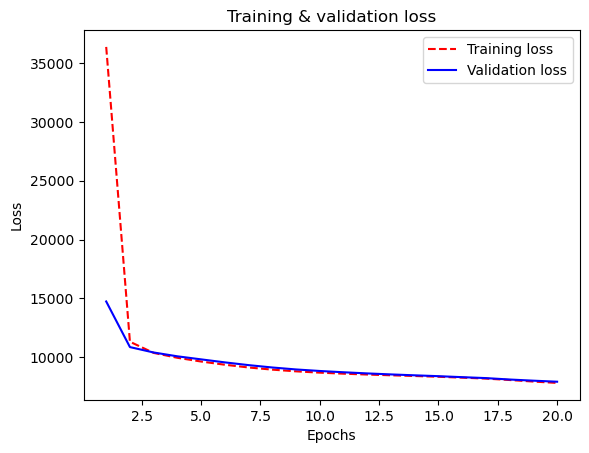

In [216]:
second_model = build_sequential_model(
    num_layers=4,
    neurons_per_layer=64,
    activation_function='relu',
    input_shape=(features_train.shape[1],),
    optimizer='adam',
    loss_function='mean_squared_error',
    metrics=['mse']
)

history = second_model.fit(features_train, target_train, epochs=20, batch_size=32, validation_data=(features_test, target_test))
plot_history(history)

In [217]:
example_predictions = show_examplary_predictions(second_model, features_test, target_test)
average_difference = example_predictions['Difference (%)'].mean()
print(f'The average difference between the actual and predicted values is {average_difference:.2f}%')

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
The average difference between the actual and predicted values is 51.99%


#### Third model with more epochs

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 45934.7383 - mse: 45938.2891 - val_loss: 12116.9150 - val_mse: 12436.6904
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 11543.0615 - mse: 11543.6006 - val_loss: 10853.4609 - val_mse: 11159.5146
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10374.2334 - mse: 10374.5830 - val_loss: 10253.1279 - val_mse: 10549.9336
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 9887.5039 - mse: 9887.7080 - val_loss: 9819.0352 - val_mse: 10096.4121
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9533.1631 - mse: 9533.2471 - val_loss: 9491.0342 - val_mse: 9741.0244
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 9275.8672 - mse: 9275.8584 - val_loss: 9253.0166 - val_mse: 9476.4668
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 9096.1240 - mse: 9096.0488 - val_loss: 9057.5137 - val_mse: 9260.9365
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 8957.7002 - mse

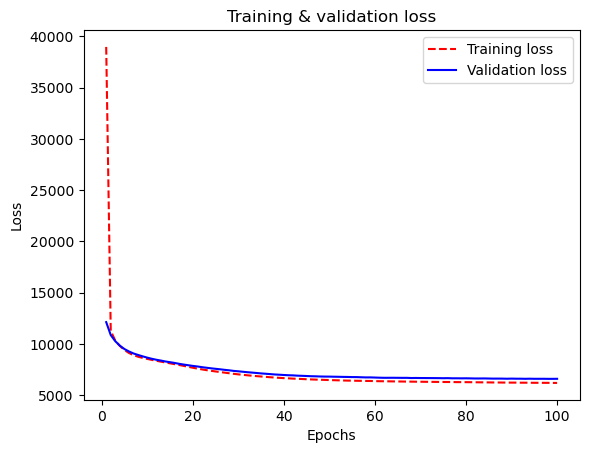

In [218]:
third_model = build_sequential_model(
    num_layers=4,
    neurons_per_layer=64,
    activation_function='relu',
    input_shape=(features_train.shape[1],),
    optimizer='adam',
    loss_function='mean_squared_error',
    metrics=['mse']
)

history = third_model.fit(features_train, target_train, epochs=100, batch_size=32, validation_data=(features_test, target_test))
plot_history(history)

In [219]:
third_example_predictions = show_examplary_predictions(third_model, features_test, target_test)
third_average_difference = third_example_predictions['Difference (%)'].mean()
print(f'The average difference between the actual and predicted values is {third_average_difference:.2f}%')

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
The average difference between the actual and predicted values is 49.12%


#### Fourth model with one more layer

Epoch 1/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 44297.0508 - mse: 44299.9805 - val_loss: 11929.3213 - val_mse: 12247.0713
Epoch 2/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 10964.6865 - mse: 10964.9688 - val_loss: 10387.9023 - val_mse: 10667.4072
Epoch 3/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 9944.9990 - mse: 9945.1025 - val_loss: 9746.9189 - val_mse: 9998.7754
Epoch 4/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 9439.9307 - mse: 9439.9023 - val_loss: 9246.7939 - val_mse: 9464.8320
Epoch 5/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9079.1787 - mse: 9079.0635 - val_loss: 8888.7617 - val_mse: 9084.0938
Epoch 6/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 8844.0029 - mse: 8843.8320 - val_loss: 8621.3867 - val_mse: 8806.5029
Epoch 7/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 8656.7764 - mse: 8656.5752 - val_loss: 8400.6191 - val_mse: 8582.3086
Epoch 8/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 8476.8477 - mse: 8476.6162

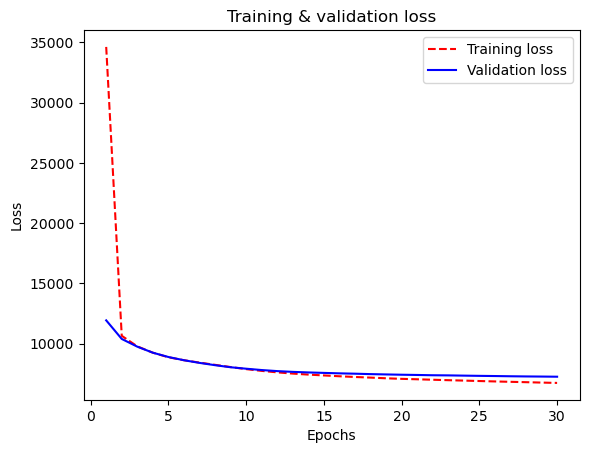

In [220]:
fourth_model = build_sequential_model(
    num_layers=5,
    neurons_per_layer=64,
    activation_function='relu',
    input_shape=(features_train.shape[1],),
    optimizer='adam',
    loss_function='mean_squared_error',
    metrics=['mse']
)

history = fourth_model.fit(features_train, target_train, epochs=30, batch_size=32, validation_data=(features_test, target_test))
plot_history(history)

In [221]:
keras_model_path = '../models/prediction_model.keras'
third_model.save(keras_model_path)

In [223]:
third_example_predictions.to_csv('../data/predictions/third_example_predictions.csv', index=False)